<ipython-input-8-84a3d912651b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['오차'][j] = error
<ipython-input-8-84a3d912651b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_real'][j] = df['y_pred'][j] + error


       Pc   온도     시간    y_real    y_pred        오차
0    2.03  140    0.5  0.980880  0.970472  0.010408
1    2.03  160    0.5  0.909910  0.890779  0.019131
2    2.03  180    0.5  0.773680  0.775926 -0.002246
3    2.03  200    0.5  0.609880  0.613048 -0.003168
4    3.26  140    0.5  0.990620  0.993109 -0.002489
..    ...  ...    ...       ...       ...       ...
635  4.81  200  144.0  0.769618  0.767462  0.002156
636  6.69  140  144.0  1.010910  0.992202  0.018708
637  6.69  160  144.0  1.028510  0.977435  0.051075
638  6.69  180  144.0  0.928044  0.937677 -0.009633
639  6.69  200  144.0  0.831604  0.835185 -0.003580

[640 rows x 6 columns]


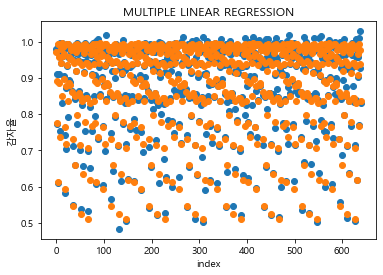

In [8]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import math
import random

plt.rc('font', family='Malgun Gothic')

df = pd.read_excel("data/N33H_ypred - time.xlsx", header=1) # N33H_r2_ypred 데이터를 시간 오름차순으로 배열
del df['Unnamed: 5']
del df['Unnamed: 6']
del df['Unnamed: 7']
df['오차'] = df['y_real']-df['y_pred']
#df.drop(columns=["Unnamed: 5", "Unnamed: 6","Unnamed: 7"])


gaussian_mean = df['오차'].mean() #평균
gaussian_std = df['오차'].std() #표준편차



# Up sampling
n=8 #증대 배율
for i in range(n-1):
    l = list(range(80))
    df = df.append(df.loc[l], ignore_index = True)
    for j in range((i+1)*80,(i+2)*80):
        error = random.gauss(gaussian_mean, gaussian_std) #가우시안 분포를 이용한 오차 랜덤 샘플링
        df['오차'][j] = error
        df['y_real'][j] = df['y_pred'][j] + error

print(df)

plt.scatter(df.index, df['y_real'])
plt.scatter(df.index, df['y_pred'])
plt.xlabel("index")
plt.ylabel("감자율")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
#seaborn.kdeplot(df['오차'], label = "Original")

r_index: 100%|#######################################################################| 66/66 [00:00<00:00, 1081.72it/s]


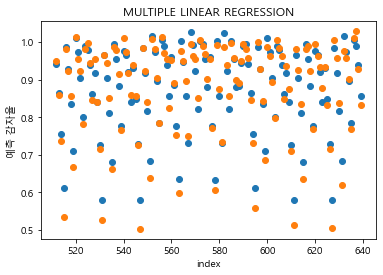

변환 차수 :  2
train cv10 R2:[ 0.96181879  0.94552939  0.95407686  0.94896356  0.96077483  0.95416261
  0.95767746  0.86663703 -0.86417135 -0.23895904]
train cv10 평균점수 : 0.6446510105240504
test set R2:  0.9604714940127939
회귀계수:  [[ 0.00000000e+00 -2.49743281e-02  7.44327136e-03 -6.11892355e-04
  -7.71253617e-03  7.24267811e-04  4.77123878e-05 -4.21364397e-05
  -3.15708158e-06  5.21866542e-06]]


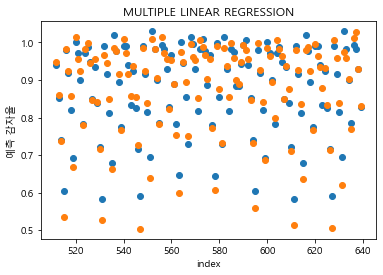

변환 차수 :  3
train cv10 R2:[ 0.96271916  0.94042416  0.9525761   0.94636495  0.96176317  0.95348751
  0.95440488  0.86661237 -0.90773735 -0.08272962]
train cv10 평균점수 : 0.6547885338415869
test set R2:  0.957332775002812
회귀계수:  [[ 0.00000000e+00 -2.57470208e-01 -1.17695701e-03  2.14050875e-03
  -7.23369812e-03  3.34855379e-03  6.61221676e-04 -1.43118507e-05
  -4.90512617e-05  1.48559739e-05 -3.98411762e-04  3.67861805e-05
  -3.48368290e-05 -8.42799690e-06 -1.39834944e-06 -5.60220965e-07
  -4.73329818e-09  1.11642221e-07  8.55423423e-08 -1.09725586e-07]]


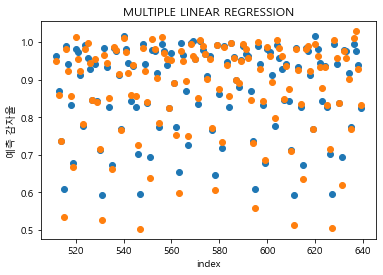

변환 차수 :  4
train cv10 R2:[ 0.95628599  0.94286197  0.95051059  0.94582447  0.96526942  0.95814408
  0.95968282  0.86668232 -0.91600423  0.04429696]
train cv10 평균점수 : 0.6673554408191913
test set R2:  0.9621972867876997
회귀계수:  [[-1.51376320e-07  7.18865705e-02  1.85513455e-06  1.23420844e-02
   1.78068172e-01 -1.15839306e-02 -1.87244786e-03  2.07258725e-04
  -2.47877032e-04  3.24802644e-04  2.02723688e-03 -2.41880442e-03
  -2.45634866e-04  1.39899058e-04  3.27222563e-05  7.39359212e-06
  -2.17621992e-06  8.85201070e-07  5.10656596e-07 -6.01079994e-06
   7.00843628e-04 -8.35447439e-05  2.48457378e-05  1.02331013e-05
  -3.05560846e-07 -3.18937977e-07 -4.47715783e-07 -9.68755304e-08
   1.11412395e-08 -3.37128503e-08  5.81489281e-09 -1.02898266e-09
   1.91134553e-10 -2.43517685e-09  2.67955591e-08]]


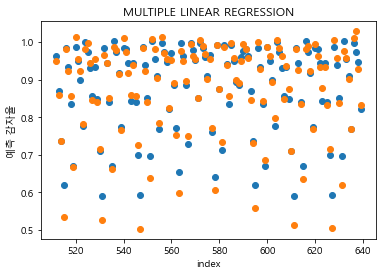

변환 차수 :  5
train cv10 R2:[ 0.96672198  0.94298099  0.952427    0.94542406  0.96437099  0.95650348
  0.95227585  0.86266873 -0.93922326  0.04580758]
train cv10 평균점수 : 0.6649957404670329
test set R2:  0.9630115074624145
회귀계수:  [[-2.27306469e-08  1.48174153e-05 -1.73326839e-10 -9.01061405e-06
  -3.93317147e-04  6.17841577e-04  2.03470701e-03  5.46880976e-09
  -3.76217196e-04  8.92236840e-03 -3.39320649e-03  1.76547175e-03
   4.92306522e-03 -8.62439941e-05 -2.83415680e-04  5.25523583e-05
   4.44491498e-07  7.32747866e-06  4.10577291e-06 -5.45223933e-04
  -1.41356857e-02  1.41203410e-03 -7.50526278e-04 -7.07069768e-05
  -3.09040240e-06 -6.02602892e-06  1.75427143e-06  1.77673402e-06
   1.18033692e-07 -4.27105573e-07 -1.08165738e-08 -5.27624835e-08
   3.36706682e-08 -1.36856045e-07  8.40372426e-06  6.91519712e-04
   4.69040103e-06  3.60250381e-05 -4.69714022e-06  8.22946205e-07
   1.71007120e-07  2.74782190e-07 -1.46102369e-08 -1.76251532e-08
   3.20287387e-08 -6.42817475e-09 -3.52099110e-09

In [9]:
## 모듈 불러옴
import smogn
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

## smogn으로 데이터 가공
N33H_smogn = smogn.smoter(
    
    data = df.truncate(after='64',axis=0), 
    y = "y_real"
)

x = df[['Pc', '온도', '시간']]
y = df[['y_real']]

x_smogn = N33H_smogn[['Pc', '온도', '시간']]
y_smogn = N33H_smogn[['y_real']]

def prediction(hyper_degree):
    # 데이터셋 분리
    x_train, _, y_train, _ = train_test_split(x_smogn, y_smogn, train_size=0.8, test_size=0.2, shuffle=False) #smogn 데이터로 학습
    _, x_test, _, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False) #144 예측
    #모델 생성
    model = LinearRegression()

    poly = PolynomialFeatures(degree = hyper_degree) # n차함수 적용
    x_train_poly = poly.fit_transform(x_train) # 데이터를 n차식으로 변형
    x_test_poly = poly.fit_transform(x_test) # 데이터를 n차식으로 변형
    model.fit(x_train_poly, y_train) # model fitting
    
    # K-fold model validation
    arr_score = cross_val_score(model,x_train_poly,y_train,scoring='r2',cv=10)
    
    
    #예측 비교
    y_predict = model.predict(x_test_poly)
    plt.scatter(y_test.index, y_predict)
    plt.scatter(y_test.index, y_test)
    plt.xlabel("index")
    plt.ylabel("예측 감자율")
    plt.title("MULTIPLE LINEAR REGRESSION")
    plt.show()
    
    # test k-fold
    #test_score = cross_val_score(model,x_test_poly, y_test,scoring='r2',cv=5)
    
    print('변환 차수 : ', hyper_degree)
    print(f"train cv10 R2:{arr_score}")
    print(f'train cv10 평균점수 : {arr_score.mean()}')
    #print(f'test cv5 R2: , {test_score}')
    #print(f'test cv5 평균점수: , {test_score.mean()}')
    print("test set R2: ", model.score(x_test_poly, y_test))
    print("회귀계수: ", model.coef_)
    

# n차항 출력
for i in range(2,6):
    prediction(i)

결과 분석: SMOGN 처리를 하지 않아도 데이터가 증가하면 일단 높은 예측률을 보임

아래는 직접 레퍼런스 식을 입력하여 구하는 코드. 그러나 아직 문제가 있어 위처럼 y_pred 엑셀파일을 직접 불러 읽음.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rc('font', family='Malgun Gothic')

df = pd.read_excel("data/N33H - time.xlsx", header=1)
x = df[['Pc', '온도', '시간']]
y = df['감자율']
del df['Unnamed: 4']



def reference_error(a,b,c,y):
    y_pred =0.99982 + 2.25718*np.exp(-1.43529*a)+(- 95.42857 + 241.68168*np.exp(-0.69673*a))*((b + 273)*(np.log(c) + 120))**(23.02658 -59.88695*np.exp(-0.71224*a))
    error= y- y_pred
    return y_pred

Pc = df['Pc']
temperature = df['온도']
time = df['시간']

df['오차'] = reference_error(Pc,temperature,time,y)

df

,Pc,온도,시간,감자율,오차
0,2.03,140,0.5,0.98088,-2.657944e+43
1,2.03,160,0.5,0.90991,-4.052771e+43
2,2.03,180,0.5,0.77368,-6.062954e+43
3,2.03,200,0.5,0.60988,-8.913691e+43
4,3.26,140,0.5,0.99062,-2.177950e+82
...,...,...,...,...,...
75,4.81,200,144.0,0.75330,-3.321271e+102
76,6.69,140,144.0,0.99606,-1.208019e+108
77,6.69,160,144.0,0.97627,-3.503534e+108
78,6.69,180,144.0,0.94345,-9.683987e+108
